In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import os
import sys


root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.utils import *
from utils.constant import *

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
# Set a seed for reproducibility
np.random.seed(42)


In [2]:
file_path = get_absolute_path(
    'one_week.csv',
    'data',
    PROJECT_BASE_DIR
)

one_week_data = pd.read_csv(file_path)

In [3]:
one_week_data.head()

,PRICE_SNAPSHOT_DATE,CATEGORY_LEVEL1,CATEGORY_LEVEL2,CATEGORY_LEVEL3,MERCH_CLASSIFICATION1,MERCH_CLASSIFICATION2,MERCH_CLASSIFICATION3,LIST_PRICE,RATING_AVG,RATING_CNT,PRODUCT_PART_NUMBER,TOTAL_UNITS,TOTAL_CURRENT_ON_HAND,NUM_DISTINCT_UNIQUE_VISIT_ID,TOTAL_DISTINCT_CUSTOMER_IDS,TOTAL_HIT_NUMBER,RECORD_HIT_NUMBER
0,2023-09-04,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.68,0.0,0,1000000838,0.0,0,0,0,0,0
1,2023-09-05,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.68,0.0,0,1000000838,0.0,0,0,0,0,0
2,2023-09-06,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.58,0.0,0,1000000838,0.0,0,0,0,0,0
3,2023-09-07,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.59,0.0,0,1000000838,0.0,0,0,0,0,0
4,2023-09-08,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.49,0.0,0,1000000838,0.0,0,0,0,0,0


In [4]:
one_week_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120498 entries, 0 to 120497
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PRICE_SNAPSHOT_DATE           120498 non-null  object 
 1   CATEGORY_LEVEL1               120498 non-null  object 
 2   CATEGORY_LEVEL2               120498 non-null  object 
 3   CATEGORY_LEVEL3               120498 non-null  object 
 4   MERCH_CLASSIFICATION1         120498 non-null  object 
 5   MERCH_CLASSIFICATION2         120498 non-null  object 
 6   MERCH_CLASSIFICATION3         120498 non-null  object 
 7   LIST_PRICE                    99456 non-null   float64
 8   RATING_AVG                    120498 non-null  float64
 9   RATING_CNT                    120498 non-null  int64  
 10  PRODUCT_PART_NUMBER           120498 non-null  int64  
 11  TOTAL_UNITS                   120498 non-null  float64
 12  TOTAL_CURRENT_ON_HAND         120498 non-nul

### Descriptive

In [5]:
# Descriptive statistics
descriptive_stats = one_week_data.describe()

# Check for missing values
missing_values = one_week_data.isnull().sum()

print(descriptive_stats)
print(missing_values)


         LIST_PRICE     RATING_AVG     RATING_CNT  PRODUCT_PART_NUMBER  \
count  99456.000000  120498.000000  120498.000000         1.204980e+05   
mean      44.815383       3.641640      80.626309         5.879398e+07   
std       31.651211       1.440005     143.724219         2.346575e+08   
min        1.530000       0.000000       0.000000         4.536700e+04   
25%       23.880000       3.650000       6.000000         9.203800e+04   
50%       37.990000       4.132600      29.000000         2.139340e+05   
75%       55.990000       4.450000      88.000000         5.725900e+05   
max      342.930000       5.000000    1674.000000         1.000059e+09   

         TOTAL_UNITS  TOTAL_CURRENT_ON_HAND  NUM_DISTINCT_UNIQUE_VISIT_ID  \
count  120498.000000          120498.000000                 120498.000000   
mean       10.123338             408.575819                    204.621653   
std        25.274319            1001.917952                    525.183980   
min         0.000000     

### Time Series

In [ ]:
# Aggregate data by date
daily_sales = updated_one_week_data.groupby('date_column_name')['TOTAL_UNITS'].sum()
daily_stock = updated_one_week_data.groupby('date_column_name')['TOTAL_CURRENT_ON_HAND'].sum()
daily_avg_rating = updated_one_week_data.groupby('date_column_name')['RATING_AVG'].mean()

# Plotting
daily_sales.plot(title='Daily Sales')
daily_stock.plot(title='Daily Stock Levels')
daily_avg_rating.plot(title='Daily Average Ratings')


In [ ]:
segment_group_data = data.groupby(['ORDER_PLACED_DTTM', 'CATEGORY_LEVEL1', 'MERCH_CLASSIFICATION3'])[[
   'TOTAL_UNITS',
 'LIST_PRICE',
 'RATING_AVG',
 'RATING_CNT',
 'TOTAL_CURRENT_ON_HAND'
]].sum().reset_index()

# Convert 'ORDER_PLACED_DTTM' to datetime
segment_group_data['ORDER_PLACED_DTTM'] = pd.to_datetime(segment_group_data['ORDER_PLACED_DTTM'])

# Set 'ORDER_PLACED_DTTM' as the index for time series analysis
segment_group_data.set_index('ORDER_PLACED_DTTM', inplace=True)

# Combine 'PRODUCT_CATEGORY_LEVEL1' and 'PRODUCT_CATEGORY_LEVEL3' into a new column
segment_group_data['SEGMENT'] = segment_group_data['CATEGORY_LEVEL1'] + ' - ' + segment_group_data['MERCH_CLASSIFICATION3']

# Convert the index to datetime
segment_group_data.index = pd.to_datetime(segment_group_data.index)

# Only keep columns I need
segment_group_data = segment_group_data[['SEGMENT', 
                                        'TOTAL_UNITS',
 'LIST_PRICE',
 'RATING_AVG',
 'RATING_CNT',
 'TOTAL_CURRENT_ON_HAND'
                                        ]]


In [ ]:

segment_group_data

,SEGMENT,TOTAL_UNITS,LIST_PRICE,RATING_AVG,RATING_CNT,TOTAL_CURRENT_ON_HAND
ORDER_PLACED_DTTM,,,,,,
2023-09-04,Bird - Food,4030.0,10430.67,1306.3756,14268.0,200209
2023-09-04,Bird - Grooming & Waste Management,182.0,595.09,74.1151,720.0,6765
2023-09-04,Bird - Habitat,57.0,4441.60,148.1795,1320.0,3614
2023-09-04,Bird - Habitat Accessories,99.0,625.24,119.3506,2979.0,6688
2023-09-04,Bird - Health & Wellness,186.0,1223.62,190.8515,410.0,15368
...,...,...,...,...,...,...
2023-09-10,Wild Bird - Food,6807.0,5253.76,1002.1878,16281.0,537634
2023-09-10,Wild Bird - Grooming & Waste Management,8.0,56.87,21.5448,113.0,1309
2023-09-10,Wild Bird - Habitat,32.0,1139.82,39.1468,126.0,3084


In [ ]:
# Group by columns and calculate the size (counts)
segment_counts = segment_group_data.groupby(['SEGMENT']).size().reset_index(name='COUNTS')

# Sort the counts in descending order
sorted_segment_counts = segment_counts.sort_values(by='COUNTS', ascending=False)

# Display the sorted counts
print(sorted_segment_counts)


                                       SEGMENT  COUNTS
134                             Dog - Dry Food       7
182                             Dog - Shampoos       7
168                 Dog - Personalized ID Tags       7
169            Dog - Personalized Pet Products       7
170                  Dog - Pill Administration       7
..                                         ...     ...
255              Services - Connect with a Vet       5
219  Gifts & Books - Apparel & People Products       4
14                 Cat - Brain & Epilepsy Care       4
205           Farm - Apparel & People Products       2
0             Bird - Apparel & People Products       1

[269 rows x 2 columns]


In [ ]:
# save data
saved_segment_group_data = segment_group_data
saved_segment_group_data_file_path = get_absolute_path(
    'segment_group_data.csv',
    'data/_small_set_sales_by_date_sku_zip',
    PROJECT_BASE_DIR
)

saved_segment_group_data.to_csv(saved_segment_group_data_file_path)

In [ ]:
saved_segment_group_data

,SEGMENT,TOTAL_UNITS,LIST_PRICE,RATING_AVG,RATING_CNT,TOTAL_CURRENT_ON_HAND
ORDER_PLACED_DTTM,,,,,,
2023-09-04,Bird - Food,4030.0,10430.67,1306.3756,14268.0,200209
2023-09-04,Bird - Grooming & Waste Management,182.0,595.09,74.1151,720.0,6765
2023-09-04,Bird - Habitat,57.0,4441.60,148.1795,1320.0,3614
2023-09-04,Bird - Habitat Accessories,99.0,625.24,119.3506,2979.0,6688
2023-09-04,Bird - Health & Wellness,186.0,1223.62,190.8515,410.0,15368
...,...,...,...,...,...,...
2023-09-10,Wild Bird - Food,6807.0,5253.76,1002.1878,16281.0,537634
2023-09-10,Wild Bird - Grooming & Waste Management,8.0,56.87,21.5448,113.0,1309
2023-09-10,Wild Bird - Habitat,32.0,1139.82,39.1468,126.0,3084


In [ ]:
saved_segment_group_data.columns

Index(['SEGMENT', 'TOTAL_UNITS', 'LIST_PRICE', 'RATING_AVG', 'RATING_CNT',
       'TOTAL_CURRENT_ON_HAND'],
      dtype='object')

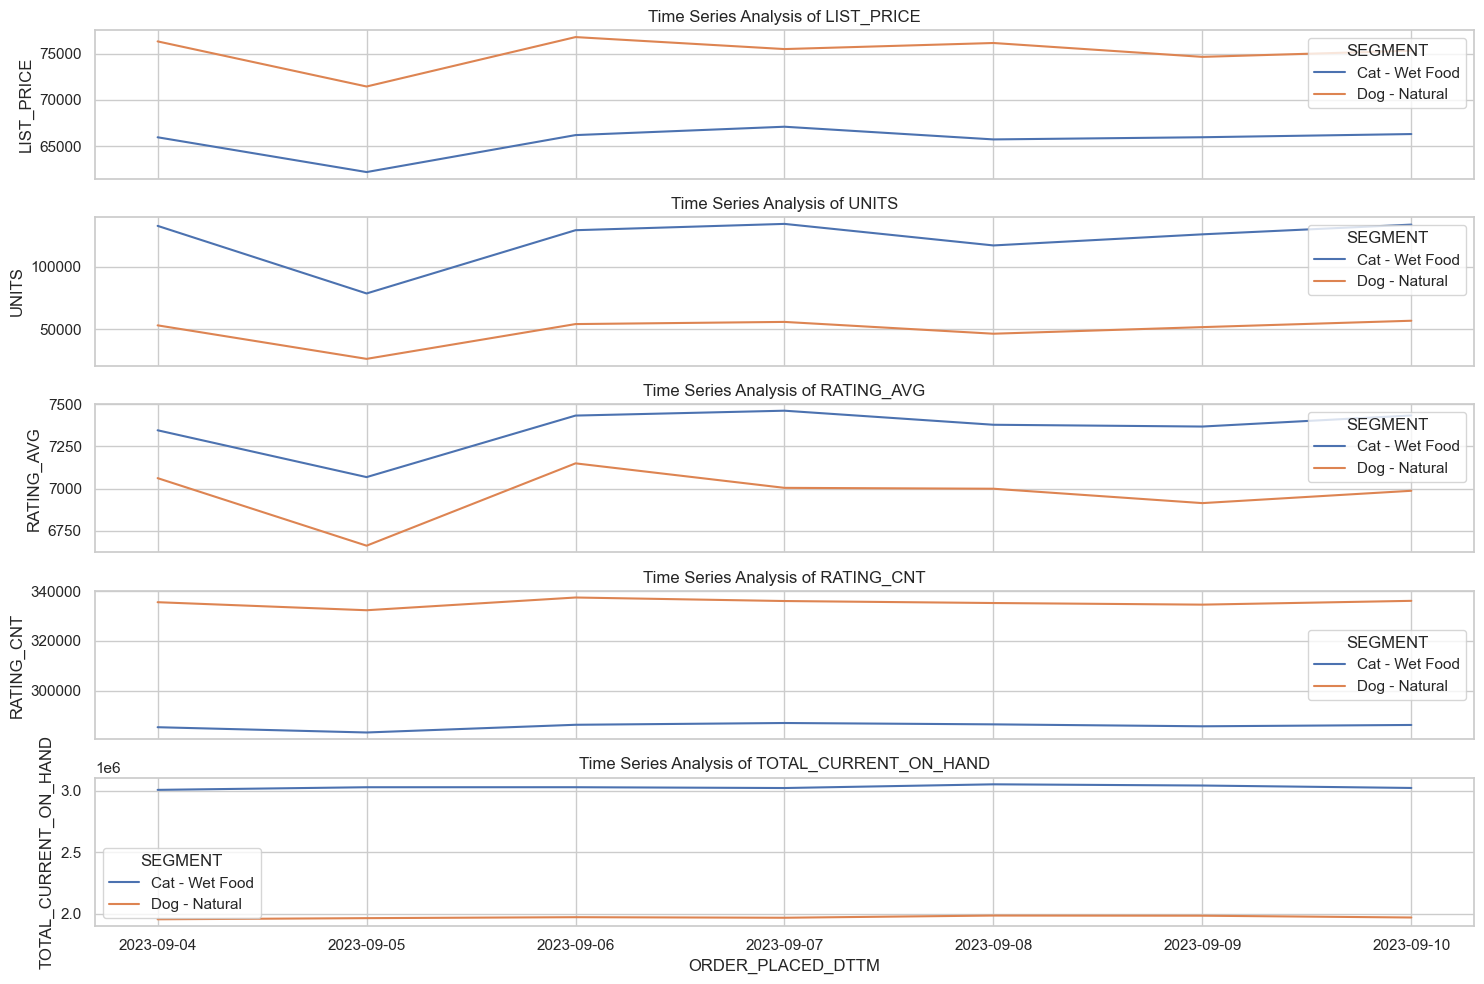

In [ ]:
# List of segments to include in the visualization
selected_segments = ['Dog - Natural',
                    #  'Dog - Freeze-Dried & Dehydrated Food Toppings',
                    #  'Dog - Eye & Ear Grooming',
                     'Cat - Wet Food',
                    # 'Pharmacy - Parasiticide'
                    ]

# Filter the data to include only the selected segments
subset_segment_group_data = segment_group_data[segment_group_data['SEGMENT'].isin(selected_segments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Plotting NET_SALES and UNITS in separate subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 10), sharex=True)

# Time Series Analysis of LIST_PRICE
sns.lineplot(x=subset_segment_group_data.index, y='LIST_PRICE', hue='SEGMENT', data=subset_segment_group_data, ax=axes[0])
axes[0].set_title('Time Series Analysis of LIST_PRICE')
axes[0].set_ylabel('LIST_PRICE')

# Time Series Analysis of UNITS
sns.lineplot(x=subset_segment_group_data.index, y='TOTAL_UNITS', hue='SEGMENT', data=subset_segment_group_data, ax=axes[1])
axes[1].set_title('Time Series Analysis of UNITS')
axes[1].set_xlabel('ORDER_PLACED_DTTM')
axes[1].set_ylabel('UNITS')


# Time Series Analysis of RATING_AVG
sns.lineplot(x=subset_segment_group_data.index, y='RATING_AVG', hue='SEGMENT', data=subset_segment_group_data, ax=axes[2])
axes[2].set_title('Time Series Analysis of RATING_AVG')
axes[2].set_ylabel('RATING_AVG')
# Time Series Analysis of RATING_CNT
sns.lineplot(x=subset_segment_group_data.index, y='RATING_CNT', hue='SEGMENT', data=subset_segment_group_data, ax=axes[3])
axes[3].set_title('Time Series Analysis of RATING_CNT')
axes[3].set_ylabel('RATING_CNT')
# Time Series Analysis of TOTAL_CURRENT_ON_HAND
sns.lineplot(x=subset_segment_group_data.index, y='TOTAL_CURRENT_ON_HAND', hue='SEGMENT', data=subset_segment_group_data, ax=axes[4])
axes[4].set_title('Time Series Analysis of TOTAL_CURRENT_ON_HAND')
axes[4].set_ylabel('TOTAL_CURRENT_ON_HAND')





# Adjust the layout for better visualization
plt.tight_layout()
plt.show()


In [ ]:
# We can not do the 7-day seasonal decomposition with only 7 days data.

""
